<a href="https://colab.research.google.com/github/Arch0290/BeZenAssignment/blob/main/BeZen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

1. Introduction
  - 1.1 Overview of the Dataset
  - 1.2 Question 1
  - 1.3 Observation Q1

2. Question 2
  - 2.1 Evaluating per product_type
  - 2.2 Evaluating per category
  - 2.3 Evaluating as per level_1
  - 2.4 Observation Q2

3. Question 3
  - 3.1 Observation Q3

4. Question 4
  - 4.1 Observation Q4

# 1. Introduction: Be Zen Assignment

This notebook attempts to solve the queries given in the assignment.
[Link to the Assignment](https://docs.google.com/document/d/1JDN4iHB4Tga30WxMnakMD9PmNrboF8BUOcL9GVrWX1Q/edit)

The first section deals with exploring the data

In [2]:
#importing the libraries

import pandas as pd
import numpy as np
import re
import matplotlib as plt

In [3]:
#Reading the csv file

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/2022_02_08-02_30_31_AM.csv")
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


In [4]:
df.info()
print("\nExploring number of null elements in the dataset\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474697 entries, 0 to 474696
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   uuid              474697 non-null  object
 1   price_string      190611 non-null  object
 2   price_string_unf  10747 non-null   object
 3   product_type      474345 non-null  object
 4   level_1           472988 non-null  object
 5   category          474345 non-null  object
dtypes: object(6)
memory usage: 21.7+ MB

Exploring number of null elements in the dataset
 uuid                     0
price_string        284086
price_string_unf    463950
product_type           352
level_1               1709
category               352
dtype: int64


1.1 **Overview of the Dataset**

- The dataset contains 6 columns describing a product
- It contains null values that needs to be explored

1.2 **Q1. To find the Products without prices**

- The price_string column has 284086 null elements.
- The difference between 'price_string' and 'price_string_unf' is not known. We use the 'prices' column to determine the products without prices.
- The final dataframe would include the 'uuid' of the products where 'prices' value is NaN (i.e without prices)

In [5]:
#Getting the total null elements for 'price_string' column
print("Total products without prices = ", df['price_string'].isnull().sum())

Total products without prices =  284086


In [6]:
#Creating a copy of the dataframe to view the entries with null 'price_string' values
df1 = df.copy(deep=True)
NaN_prices_product = df1[df1['price_string'].isnull()]
df2 = NaN_prices_product.iloc[:, 0:2]

In [7]:
print(df2.info())
print("\n Number of unique products without prices = ", len(df2.uuid.unique()))
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284086 entries, 0 to 474696
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   uuid          284086 non-null  object
 1   price_string  0 non-null       object
dtypes: object(2)
memory usage: 6.5+ MB
None

 Number of unique products without prices =  822


,uuid,price_string
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN


1.3 **Observation Q1**
- The dataframe df2 includes the 'uuid' of all the products without prices
- The total entries without prices is 284,086
- There are 822 different products without prices listed in the given data

2. **Q2. Count of products without prices and with prices in each Product Type, Category, Level 1**

- NaN_prices_product dataframe includes data where 'price_string' are NaN
- df_notnull dataframe includes data where 'price_string' data is available


In [35]:
df.groupby(['price_string','product_type','level_1'], dropna=False)['category'].value_counts()

price_string  product_type          level_1                  category                        
$0.00         Q2hlZWsgbWFrZSB1cA    RmFjZSBIaWdobGlnaHRlcg   YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl     322
                                    UGlnbWVudGVkIEJsdXNo     YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl     356
              QmVkc2hlZXRz          UGVyY2FsZSBiZWRzaGVldHM  SG91c2Vob2xkIGFuZCBDbGVhbmluZw       369
                                    c2F0ZWVuIGJlZHNoZWV0cw   SG91c2Vob2xkIGFuZCBDbGVhbmluZw       340
              RG9nIHRveXMgcGV0      RG9nIHRveXM              cGV0IHN1cHBsaWVz                     339
                                                                                                 ... 
NaN           d29tZW5zIFdhbGxldA    d29tZW5zIFdhbGxldA       Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz     366
              d29tZW5zIHN3ZWF0ZXJz  Q2FyZGlnYW4              Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz    1068
                                    SG9vZGll                 Q2xvdGhpbmcgYW5kIEFjY2Vzc29ya

In [ ]:
#dropping rows where 'price_string' is NaN

df_notnull = df1.dropna(subset=['price_string'])
df_notnull.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,NaN,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,NaN,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


2.1 **Evaluating per product_type**

In [ ]:
#Count of Products with prices in each Product Type

df_notnull.groupby('product_type')['price_string'].value_counts()

product_type            price_string
Q29mZmVlIEJlYW5z        $6.75           1042
Q29uZGl0aW9uZXIgSGFpcg  $38.00           354
Q29va2luZyBPaWw         $16.99           360
                        $13.99           350
                        $14.49           349
                                        ... 
d29tZW5zIFdhbGxldA      $195             359
                        $100             342
d29tZW5zIHN3ZWF0ZXJz    $59              336
                        $159             321
                        $139             305
Name: price_string, Length: 482, dtype: int64

In [ ]:
#Count of Products without prices in each Product Type

NaN_prices_product.product_type.value_counts()

V29tZW5zIHN3aW13ZWFy                      4773
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg    4621
VG9kZGxlcnMvbmV3Ym9ybiBiYWJpZXM           4321
VmVoaWNsZSBUb3lz                          4111
UGx1cyBzaXplIHdlYXI                       4086
                                          ... 
RG91Z2ggSmFyLSBQYWNrIG9mIDM                319
QmF0aCBTYWx0cw                             318
UmVmcmlnZXJhdG9yIFdhdGVyIEZpbHRlcg         311
TGFwdG9wcw                                 308
SG9uZXk                                    300
Name: product_type, Length: 278, dtype: int64

2.2 **Evaluating per category**

In [ ]:
#Count of Products with prices in each Category

df_notnull.groupby('category')['price_string'].value_counts()

category                          price_string
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz  $89             3893
                                  $160            2476
                                  $199            2086
                                  $79             2080
                                  $75.00          1959
                                                  ... 
cGV0IHN1cHBsaWVz                  $10.00           361
                                  $16.99           343
                                  $30.00           339
                                  $28.00           337
                                  $49.00           324
Name: price_string, Length: 336, dtype: int64

In [ ]:
#Count of Products without prices in each Category

count_category_noPrice = NaN_prices_product.category.value_counts()
count_category_noPrice

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       70754
Z3JvY2VyaWVz                           39083
SG91c2Vob2xkIGFuZCBDbGVhbmluZw         30135
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl       24835
SGVhbHRo                               24153
VG95cyBhbmQgR2FtZXM                    20736
cGV0IHN1cHBsaWVz                       20134
QmFieWNhcmU                            19584
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ    11004
a2l0Y2hpbmcgYW5kIGRpbmluZw              8636
RWxlY3Ryb25pY3M                         7309
QXJ0IHN1cHBsaWVz                        4625
b2ZmaWNlIHByb2R1Y3Rz                    2746
Name: category, dtype: int64

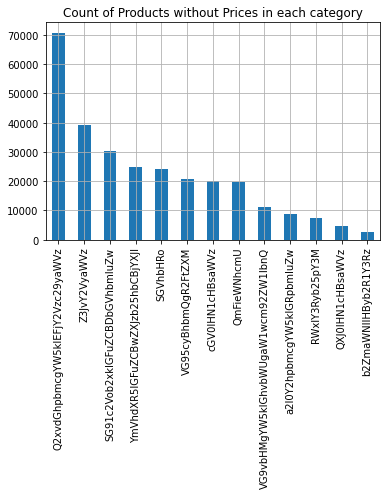

In [ ]:
#Plotting Count of Products without Prices in each category

count_category_noPrice.plot(kind='bar', title='Count of Products without Prices in each category', grid=True)

2.3 **Evaluating as per level_1**

In [ ]:
#Count of Products with prices as per level_1

df_notnull.groupby('level_1')['price_string'].value_counts()

level_1             price_string
MTAgQ3Vw            $34.99          369
MjAgQ3Vw            $34.99          359
MjAgUGludHM         $189.97         343
MzAgQ3Vw            $44.99          330
MzAtIDM1IFBpbnRz    $209.97         353
                                   ... 
eW9nYSBCbG9ja3M     $18.00          328
eW9nYSBib2xzdGVycw  $80.00          345
eW9nYSBzdHJhcHM     $24.00          360
                    $18.00          359
                    $12.95          352
Name: price_string, Length: 537, dtype: int64

In [ ]:
#Count of Products without prices as per level_1

count_level_1_noPrice = NaN_prices_product.level_1.value_counts()
count_level_1_noPrice

Rm9ybWFsIFN1aXRz       2175
U3dlYXRzaGlydA         1939
U29ja3M                1650
Rm9ybWFsIFBhbnRz       1645
U3dlYXRlcg             1421
                       ... 
ZGlzaCBicnVzaA          309
TGFwdG9wcw              308
RXh0ZXJpb3IgUGFpbnQ     301
VmVnYW4gSG9uZXk         300
TWVucyBzdXJmIHN1aXQ     284
Name: level_1, Length: 476, dtype: int64

**The above solutions for products with prices can be viewed and understood better by unstacking the groupby objects.**

- Let's take the example of finding the count of products with prices as per the category



In [ ]:
#Unstacking and counting the grouped elements
#Count of Products with prices in each Category
df_notnull.groupby('category')['price_string'].value_counts().unstack().fillna(0)

price_string,$0.00,$10.00,$10.29,$10.99,$100,$100.00,$1099,$11.00,$11.30,$11.75,...,14.95,17.00,21.00,22.00,32.99,5.75,52.00,6.60,67.00,7.00
category,,,,,,,,,,,,,,,,,,,,,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,0.0,0.0,0.0,0.0,342.0,693.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,0.0
QXJ0IHN1cHBsaWVz,0.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QmFieWNhcmU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RWxlY3Ryb25pY3M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,3175.0,0.0,0.0,335.0,0.0,0.0,348.0,366.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SGVhbHRo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VG95cyBhbmQgR2FtZXM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,4196.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2.4 **Observation Q2**

- For example, the category **"SG91c2Vob2xkIGFuZCBDbGVhbmluZw"** has **3175** products with price **\$0** and **335** products with price **$10.99**

3. **Q3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.**

- We use Regular Expressions to extract the numbers and currency from the 'price_string' column

- We add additional columns 'final_price' and 'currency' to add the extracted elements




In [18]:
#understanding the pattern of 'price_string'
df['price_string'].unique()

array([nan, '$19.95', '$92.00', '11.50', '$24.99', '$148.00', '$89',
       '$14.95', '$55.00', '32.99', '52.00', '$11.30', '$13.99', '$6.95',
       '$0.00', '$129', '$10.99', '$6.49', '$18.99', '$179', '$9.99',
       '$3.99', '$549', '$16.99', '$49.99', '$90.00', '$12.99', '$59',
       '$85.00', '$128.00', '$150', '$6.99', '$34.00', '$248.00', '$4.99',
       '$65', '11.00', '$459', '$199', '14.95', '$135.05', '$1099',
       '$7.97', '$6.75', '$15.00', '$5.29', '$10.00', '7.00', '$80.00',
       '$2.29', '$119', '6.60', '$399', '$39.95', '12.00', '$8.99', '$79',
       '$35', '$34.95', '$99', '$18.95', '$459.99', '$58.00', '$25.70',
       '$3.50', '$619.00', '$95', '$159', '$45', '$149', '$85', '$8.95',
       '$69', '$14.00', '$38.00', '$6.50', '$12.50', '$24.00', '$27.00',
       '$82.75', '$9.95', '$26.96', '$17.96', '$15.99', '$6.17', '$75',
       '$250', '$29.00', '$1198', '$18.00', '$45.00', '$44.00', '$14.99',
       '$249', '$86.00', '$160', '$14.37', '$7.99', '$178', '$

In [ ]:
#initialising and extracting the required patterns to form new columns

pattern1 = r'([0-9]+.[0-9]+)'
pattern2 = r'([$])'

#Extracting the currency
df['currency'] = df['price_string'].str.extract(pattern2)

#Extracting the numerical price
df['final_price'] = df['price_string'].str.extract(pattern1)
len(df['final_price'].unique())

220

In [ ]:
#Display the 'uuid' with prices and currencies
df3 = df.loc[:,['uuid','currency','final_price']]
df3.head()

,uuid,currency,final_price
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN
2,acbd66ff-79f8-467a-91f9-108a45af5626,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,NaN,11.50


In [ ]:
#Dropping the rows with NaN final price

df3.dropna(subset = ['final_price'])

,uuid,currency,final_price
2,acbd66ff-79f8-467a-91f9-108a45af5626,$,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,NaN,11.50
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$,24.99
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$,148.00
...,...,...,...
474681,a1619515-b831-44bf-912d-54388755e39e,$,38.00
474686,8e4fdac3-afc9-4242-9136-90d13e116724,$,6.75
474687,74b624ff-8aa3-41b8-a806-8ade050f3831,NaN,22.00
474690,61a43aa5-d432-4e99-ab5d-fec791de21fa,$,17.99


3.1 **Observation Question 3**
- The string was in the format \$ [float number]. We use regular expression the extract the required values, i.e the numbers (final_price) and $ (currencies).
- The dataframe df3 ignores all the NaN values in the 'final_price' column and displays the priced products 'uuid', 'currency' and 'final_price'
- There are a few entries in 'currency' column with NaN values, which can be assumed as '\$', as maximum of the entries in the given dataset is in '\$'

4. **Q4. List out the categories with average price of product.**
- The 'final_price' column contains numerical values in string format. They need to be converted to floating points
- The average price can be calculated by grouping the dataframe w.r.t 'category' and then finding the mean.

In [ ]:
df['final_price'] = df['final_price'].astype('float')

In [ ]:
avg_price = df.groupby('category')['final_price'].agg(np.mean)
avg_price

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       157.243994
QXJ0IHN1cHBsaWVz                        19.042907
QmFieWNhcmU                            160.559798
RWxlY3Ryb25pY3M                         63.468416
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          77.629610
SGVhbHRo                                32.512631
VG95cyBhbmQgR2FtZXM                     32.100077
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     84.800852
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        34.949780
Z3JvY2VyaWVz                            10.482517
a2l0Y2hpbmcgYW5kIGRpbmluZw              16.580869
b2ZmaWNlIHByb2R1Y3Rz                    20.450415
cGV0IHN1cHBsaWVz                        13.976608
Name: final_price, dtype: float64

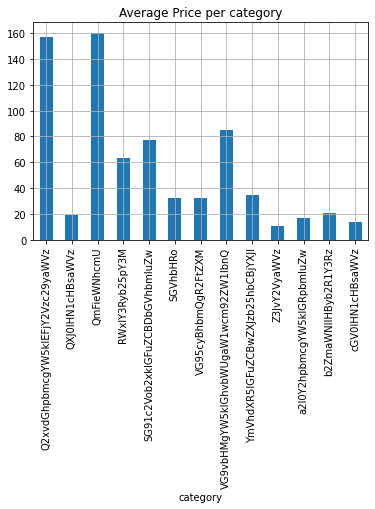

In [ ]:
#Plotting the Avgerage Price per category
avg_price.plot(kind='bar', title='Average Price per category', grid=True)

4.1 **Observation Q4**
- There are a total of 13 categories (exculding the NaN entries)
- The highest average price across the categories is \$160.56 and lowest is  \$10.48